### Comparison of PVH and VMH for SSIB poster
Adapted from Linnea's script - PVH_vs_VMH_restricted.ipynb

In [1]:
from pathlib import Path
import pickle
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.transforms import blended_transform_factory
import seaborn as sns

import trompy as tp

colors_PVH = "#219C90"
colors_VMH  = "#90219c"

colors = [colors_PVH, colors_VMH]

cmap = "RdBu_r"

In [2]:
DATAFOLDER = Path("C:/Data/hislight_pickles/")
FIGSFOLDER = Path("C:/Users/kvo019/OneDrive - UiT Office 365/Pipette 2/People/Linnea/Manuscripts/hislight paper/figures")

with open(DATAFOLDER / "restricted_dark.pickle", 'rb') as handle:
    PVH = pickle.load(handle)

with open(DATAFOLDER / "HL3_restricted_dark.pickle", 'rb') as handle:
    VMH = pickle.load(handle)    

In [3]:
PVH_list_of_mice = []
VMH_list_of_mice = []

mice_to_exclude = ["HL313", "HL314", "HL315", "HL316", "HL317", "HL318", "HL306", "HL308",
                    "HL202", "HL205", "HL206", "HL211",
                    "HL301", "HL304", "HL305"]

#"HL202", "HL205", "HL206", "HL211" have poor placements without virus in PVH
#HL 306, 308 have no virus
#HL301, HL304, HL305 have poor fiber placement
#HL313 - HL318 are control mice


for key, val in PVH.items():
    if val["mouse_ID"] not in mice_to_exclude:
        if val["mouse_ID"] not in PVH_list_of_mice:
            PVH_list_of_mice.append(val["mouse_ID"])
        
for key, val in VMH.items():
    if val["mouse_ID"] not in mice_to_exclude:
        if val["mouse_ID"] not in VMH_list_of_mice:
            VMH_list_of_mice.append(val["mouse_ID"])

In [4]:
def get_snips(data, mice):

    snips_mean_start= []
    snips_mean_end = []
    snips_mean_full = []

    kwargs={"bins":150, "trial_length":15, "baseline_length":5}   

    pre = 5
    post = 10
    mineventlength=8
    binlength=0.1

    for mouse in mice:
        snips_start = []
        snips_end = []
        snips_full = []

        for key, val in data.items():
            if val["mouse_ID"]==mouse:
                if len(val["licks"]) < 10:
                    continue

                lickdata= tp.lickCalc(val["licks"], minrunlength=3)

                snips_start.append(tp.snipper(val["corrected"], lickdata["rStart"], val["fs"], **kwargs)[0])
                snips_end.append(tp.snipper(val["corrected"], lickdata["rEnd"], val["fs"], **kwargs)[0])

                snipper = tp.Snipper(val["corrected"],
                                        lickdata["rStart"],
                                        end=lickdata["rEnd"],
                                        fs=val["fs"],
                                        pre=pre,
                                        post=post,
                                        binlength=binlength,
                                        zscore=True
                                        )

                snipper.truncate_to_same_length(cols_to_add=10, mineventlength=8, eventbalance=[6,2])
                snipper.find_potential_artifacts(threshold=12, method="absolute_diff", showplot=True, remove=True)
                snips_full.append(snipper.snips)


        snips_start = np.vstack(snips_start)
        snips_end = np.vstack(snips_end)
        
        try:
            snips_full = np.vstack(snips_full)
            snips_mean_full.append(np.mean(snips_full, axis=0))
            print("adding this mouse")
        except:
            print("no snips to concatenate")

        snips_mean_start.append(np.mean(snips_start, axis=0))
        snips_mean_end.append(np.mean(snips_end, axis=0))
   
    snips_mean_full = np.array(snips_mean_full)
    
    return snips_mean_start, snips_mean_end, snips_mean_full

<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
adding this mouse
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
adding this mouse
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
<class 'numpy.ndarray'>

C:\Users\kvo019\Anaconda3\lib\site-packages\trompy\snipper_class.py:215: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  self.snips = np.array([self.put_snip_in_bins(snip) for snip in self.snips])
C:\Users\kvo019\Anaconda3\lib\site-packages\trompy\snipper_class.py:229: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  self.snips = np.array(z_snips)
C:\Users\kvo019\Anaconda3\lib\site-packages\trompy\snipper_class.py:215: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with di


Found 0 potential artifacts.
No artifacts found.
adding this mouse
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
<class 'numpy.ndarray'>
Found 2 potential artifacts.
adding this mouse
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
<class 'numpy.ndarray'>
Found 0 potential artifacts.


C:\Users\kvo019\Anaconda3\lib\site-packages\trompy\snipper_class.py:215: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  self.snips = np.array([self.put_snip_in_bins(snip) for snip in self.snips])
C:\Users\kvo019\Anaconda3\lib\site-packages\trompy\snipper_class.py:229: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  self.snips = np.array(z_snips)
C:\Users\kvo019\Anaconda3\lib\site-packages\trompy\snipper_class.py:215: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with di

No artifacts found.
adding this mouse
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
adding this mouse
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
<class 'numpy.ndarray'>
Found 1 potential artifacts.
adding this mouse
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.


C:\Users\kvo019\Anaconda3\lib\site-packages\trompy\snipper_class.py:215: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  self.snips = np.array([self.put_snip_in_bins(snip) for snip in self.snips])
C:\Users\kvo019\Anaconda3\lib\site-packages\trompy\snipper_class.py:229: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  self.snips = np.array(z_snips)
C:\Users\kvo019\Anaconda3\lib\site-packages\trompy\snipper_class.py:215: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with di

<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
adding this mouse
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
<class 'numpy.ndarray'>
Found 1 potential artifacts.
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
adding this mouse
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
adding this mouse
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
<class 'numpy.ndarray'>
Found 0 potential artifacts.


C:\Users\kvo019\Anaconda3\lib\site-packages\trompy\snipper_class.py:215: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  self.snips = np.array([self.put_snip_in_bins(snip) for snip in self.snips])
C:\Users\kvo019\Anaconda3\lib\site-packages\trompy\snipper_class.py:229: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  self.snips = np.array(z_snips)
C:\Users\kvo019\Anaconda3\lib\site-packages\trompy\snipper_class.py:215: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with di

No artifacts found.
adding this mouse
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
adding this mouse
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
adding this mouse
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.


C:\Users\kvo019\Anaconda3\lib\site-packages\trompy\snipper_class.py:215: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  self.snips = np.array([self.put_snip_in_bins(snip) for snip in self.snips])
C:\Users\kvo019\Anaconda3\lib\site-packages\trompy\snipper_class.py:229: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  self.snips = np.array(z_snips)
C:\Users\kvo019\Anaconda3\lib\site-packages\trompy\snipper_class.py:215: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with di

<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
adding this mouse


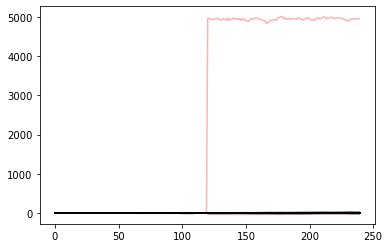

In [5]:
PVH_snips_mean_start, PVH_snips_mean_end, PVH_snips_mean_full = get_snips(PVH, PVH_list_of_mice)
VMH_snips_mean_start, VMH_snips_mean_end, VMH_snips_mean_full = get_snips(VMH, VMH_list_of_mice)

In [6]:
pre = 5
post = 10
mineventlength=8
binlength=0.1

eventbalance=[6,2]

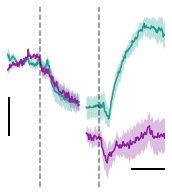

In [8]:
f, [ax1, ax2] =plt.subplots(ncols=2,
                            figsize=[2.4,2.5],
                                        gridspec_kw={"width_ratios":[15,1],
                                                     "wspace": 0.05,
                                                     "hspace": 0.1,
                                                     "left": 0,
                                                     "top": 1,
                                                     "bottom": 0,
                                                     "right": 1})

ax2.remove()

try:
    assert(eventbalance[0] + eventbalance[1] == mineventlength)
    early_t = eventbalance[0]
    late_t = eventbalance[1]
except:
    print("No event balance given. Using default 50-50 split.")
    early_t = mineventlength/2
    late_t = mineventlength/2
            
bins_early = int((pre + early_t) / binlength)
bins_late = int((post + late_t) / binlength)

#PVH
x1_PVH = np.arange(0,bins_early)
x2_PVH= np.arange(PVH_snips_mean_full.shape[1] - bins_late, PVH_snips_mean_full.shape[1])

mean_PVH = np.mean(PVH_snips_mean_full, axis=0)
error_values_PVH = np.std(PVH_snips_mean_full, axis=0) / np.sqrt(len(PVH_snips_mean_full))

ax1.plot(x1_PVH, mean_PVH[:bins_early], color=colors_PVH)
ax1.plot(x2_PVH, mean_PVH[-bins_late:], color=colors_PVH)

ax1.fill_between(x1_PVH, mean_PVH[:bins_early]-error_values_PVH[:bins_early], 
                mean_PVH[:bins_early]+error_values_PVH[:bins_early], 
                color=colors_PVH, alpha=0.3,
                linewidth=0)
ax1.fill_between(x2_PVH, mean_PVH[-bins_late:]-error_values_PVH[-bins_late:], 
                mean_PVH[-bins_late:]+error_values_PVH[-bins_late:], 
                color=colors_PVH, alpha=0.3,
                linewidth=0)

#VMH
x1_VMH = np.arange(0,bins_early)
x2_VMH= np.arange(VMH_snips_mean_full.shape[1] - bins_late, VMH_snips_mean_full.shape[1])

mean_VMH = np.mean(VMH_snips_mean_full, axis=0)
error_values_VMH = np.std(VMH_snips_mean_full, axis=0) / np.sqrt(len(VMH_snips_mean_full))

ax1.plot(x1_VMH, mean_VMH[:bins_early], color=colors_VMH)
ax1.plot(x2_VMH, mean_VMH[-bins_late:], color=colors_VMH)

ax1.fill_between(x1_VMH, mean_VMH[:bins_early]-error_values_VMH[:bins_early], 
                mean_VMH[:bins_early]+error_values_VMH[:bins_early], 
                color=colors_VMH, alpha=0.3,
                linewidth=0)
ax1.fill_between(x2_VMH, mean_VMH[-bins_late:]-error_values_VMH[-bins_late:], 
                mean_VMH[-bins_late:]+error_values_VMH[-bins_late:], 
                color=colors_VMH, alpha=0.3,
                linewidth=0)


for spine in ["top", "right", "left", "bottom"]:
    ax1.spines[spine].set_visible(False)

ax1.set_yticks([])
ax1.set_xticks([])

ax1.set_xlim([0,240])

transform = blended_transform_factory(ax1.transData, ax1.transAxes)
ax1.plot([190,240], [0.10, 0.10], linewidth=2, color="k", transform=transform)

ax1.plot([2,2], [-1, -2], linewidth=2, color="k")

ax1.axvline(50, color="k", linestyle="--", alpha=0.5)
ax1.axvline(140, color="k", linestyle="--", alpha=0.5)

f.savefig(FIGSFOLDER / "PVH_vs_VMH_restricted_v02.pdf")

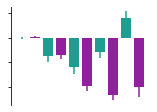

In [12]:
def auc(data, epoch=(50, 70)):
    """Compute area under the curve (AUC) for a given epoch, normalized by the epoch length."""
    epoch_data = np.array(data)[:, epoch[0]:epoch[1]]
    auc_value = np.trapz(epoch_data, axis=1)
    epoch_length = epoch[1] - epoch[0]  # Calculate the epoch length
    return auc_value / epoch_length  # Normalize by epoch length

def mean_auc(data, epoch=(50, 70)):
    """Compute the mean normalized AUC for a given epoch."""
    return np.mean(auc(data, epoch=epoch))

# Define epochs
baseline_epoch =(10, 50)
early_lick_epoch = (50, 110)
late_lick_epoch = (120, 140)
early_post_epoch = (140,190)
late_post_epoch = (190,240)

epochs = [baseline_epoch, early_lick_epoch, late_lick_epoch, early_post_epoch, late_post_epoch]

regions = ['PVH', 'VMH']
snips = [PVH_snips_mean_full, VMH_snips_mean_full]
colors = [colors_PVH, colors_VMH]

f, ax = plt.subplots(figsize=[2.5, 1.8])  

mean_aucs = []
std_errors = []

# Collect normalized AUC data
for epoch in epochs:
    for snip in snips:
        auc_data = auc(snip, epoch=epoch)
        mean_aucs.append(np.mean(auc_data))
        std_errors.append(np.std(auc_data) / np.sqrt(len(auc_data)))

# Plotting 
x_positions = np.arange(len(mean_aucs)) 

ax.bar(x_positions, mean_aucs, color=colors * len(epochs))

for x, ymean, yerr, color in zip(x_positions, mean_aucs, std_errors, colors * len(epochs)):
    ax.errorbar(x, ymean, yerr=yerr, color=color, zorder=0)
    

ax.set_xticks([])
ax.set_yticks([1, 0, -1, -2])
ax.set_yticklabels([])
#ax.set_yticklabels([])

# Hide spines
for spine in ["top", "right", "bottom"]:
    ax.spines[spine].set_visible(False)

## Save the figure
f.savefig(FIGSFOLDER / "PVH_vs_VMH_AUC_2.pdf")

plt.show()

#getting CSV file for stats
epoch_labels = ["baseline_epoch", "early_lick_epoch", "late_lick_epoch", "early_post_epoch", "late_post_epoch"]

headers = []
for epoch_label in epoch_labels:
    for region in regions:
        headers.append(f'{region} {epoch_label}')

auc_all_epochs = []

for epoch in epochs:
    auc_epoch = np.column_stack([auc(snip, epoch=epoch) for snip in snips])
    auc_all_epochs.append(auc_epoch)

auc_all_epochs = np.hstack(auc_all_epochs)

headers_array = np.array(headers).reshape(1, -1)

auc_with_headers = np.vstack([headers_array, auc_all_epochs])

## Save to a CSV file
#np.savetxt('C:/Users/kvo019/OneDrive - UiT Office 365/Pipette 2/People/Linnea/Manuscripts/hislight paper/PVH_vs_VMH_auc_epochs_with_labels.csv', auc_with_headers, delimiter=',', fmt='%s')


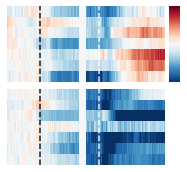

In [13]:
f,[[ax1, ax2], [ax3, ax4]]=plt.subplots(nrows=2, ncols=2,
                                        figsize=[2.4,2.2],
                                        gridspec_kw={"width_ratios":[15,1],
                                                     "wspace": 0.05,
                                                     "hspace": 0.1,
                                                     "left": 0,
                                                     "top": 1,
                                                     "bottom": 0,
                                                     "right": 1})



sns.heatmap(PVH_snips_mean_full, ax=ax1, cbar_ax= ax2, cmap=cmap, vmax=3, vmin=-3,
            cbar_kws={"ticks": []})
sns.heatmap(VMH_snips_mean_full, ax=ax3, cbar_ax= ax4, cmap=cmap, vmax=3, vmin=-3, cbar_kws={"ticks": [2, 0, -2]})

ax4.remove()

ax1.set_yticks([])
ax1.set_xticks([])
ax1.axvline(50, color="k", linestyle="--", alpha=0.9)
ax1.axvline(140, color="white", linestyle="--", alpha=0.9)

ax3.set_yticks([])
ax3.set_xticks([])
ax3.axvline(50, color="black", linestyle="--", alpha=0.9)
ax3.axvline(140, color="white", linestyle="--", alpha=0.9)

f.savefig(FIGSFOLDER / "PVH_vs_VMH_heatmap_2.pdf")